<a href="https://colab.research.google.com/github/Pranjal-Malik/stock-analysis-tsla-byd-nio/blob/main/Stock_price_analysis_EV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install yfinance if needed
!pip install yfinance

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Make charts bigger
plt.rcParams['figure.figsize'] = (12,6)


In [2]:
import yfinance as yf
import pandas as pd

tickers = ["TSLA","BYDDF","NIO"]
data = yf.download(tickers, start="2018-01-01", progress=False)

print("TYPE:", type(data))
print("SHAPE:", data.shape)
print("COLUMNS (first 20):")
print(data.columns[:20])
print("\nHEAD:")
display(data.head())


/tmp/ipython-input-3875017127.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start="2018-01-01", progress=False)


TYPE: <class 'pandas.core.frame.DataFrame'>
SHAPE: (1978, 15)
COLUMNS (first 20):
MultiIndex([( 'Close', 'BYDDF'),
            ( 'Close',   'NIO'),
            ( 'Close',  'TSLA'),
            (  'High', 'BYDDF'),
            (  'High',   'NIO'),
            (  'High',  'TSLA'),
            (   'Low', 'BYDDF'),
            (   'Low',   'NIO'),
            (   'Low',  'TSLA'),
            (  'Open', 'BYDDF'),
            (  'Open',   'NIO'),
            (  'Open',  'TSLA'),
            ('Volume', 'BYDDF'),
            ('Volume',   'NIO'),
            ('Volume',  'TSLA')],
           names=['Price', 'Ticker'])

HEAD:


Price          Close                     High                      Low      \
Ticker         BYDDF NIO       TSLA     BYDDF NIO       TSLA     BYDDF NIO   
Date                                                                         
2018-01-02  2.858313 NaN  21.368668  2.887185 NaN  21.474001  2.839065 NaN   
2018-01-03  2.957760 NaN  21.150000  2.957760 NaN  21.683332  2.887185 NaN   
2018-01-04  2.912850 NaN  20.974667  2.970593 NaN  21.236668  2.903225 NaN   
2018-01-05  2.890393 NaN  21.105333  2.925681 NaN  21.149332  2.867937 NaN   
2018-01-08  2.896809 NaN  22.427334  2.912850 NaN  22.468000  2.842273 NaN   

Price                      Open                 Volume                 
Ticker           TSLA     BYDDF NIO       TSLA   BYDDF NIO       TSLA  
Date                                                                   
2018-01-02  20.733334  2.839065 NaN  20.799999  537300 NaN   65283000  
2018-01-03  21.036667  2.887185 NaN  21.400000  545100 NaN   67822500  
2018-01-04  20.378668  2.909641 NaN  20.858000  376200 NaN  149194500  
2018-01-05  20.799999  2.867937 NaN  21.108000  234000 NaN   68868000  
2018-01-08  21.033333  2.890393 NaN  21.066668  365400 NaN  147891000

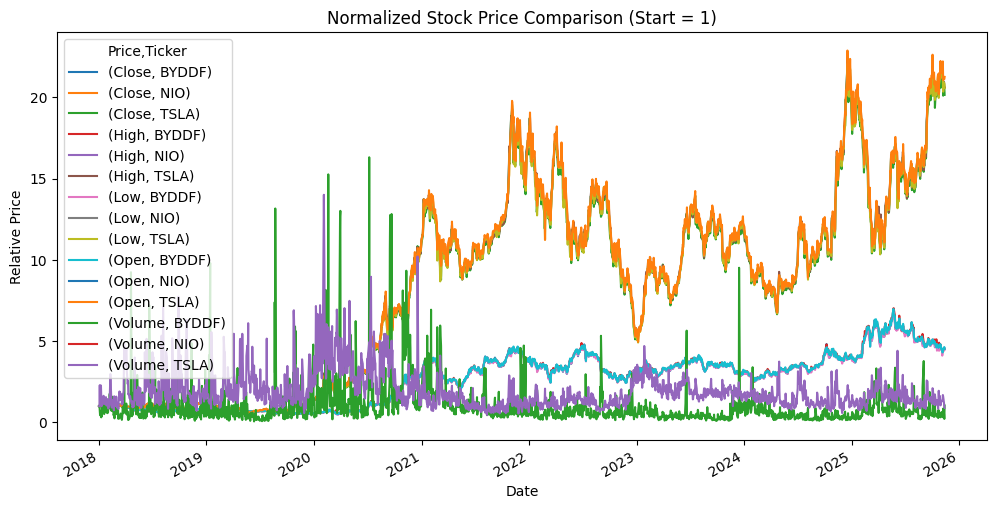

In [5]:
# Extract adjusted close prices correctly
import pandas as pd

def get_adj_close(df):
    if isinstance(df.columns, pd.MultiIndex):
        if 'Adj Close' in df.columns.get_level_values(1):
            adj = df.loc[:, df.columns.get_level_values(1) == 'Adj Close']
            adj.columns = adj.columns.get_level_values(0)
            return adj
        elif 'Close' in df.columns.get_level_values(1):
            adj = df.loc[:, df.columns.get_level_values(1) == 'Close']
            adj.columns = adj.columns.get_level_values(0)
            return adj
    else:
        if 'Adj Close' in df.columns:
            return df[['Adj Close']] if df['Adj Close'].ndim == 1 else df['Adj Close']
        elif 'Close' in df.columns:
            return df[['Close']] if df['Close'].ndim == 1 else df['Close']
    return df

adj = get_adj_close(data)

# Normalize prices so they start at the same value
normalized = adj / adj.iloc[0]

# Plot comparison
normalized.plot(figsize=(12,6), title="Normalized Stock Price Comparison (Start = 1)")
plt.ylabel("Relative Price")
plt.show()

In [ ]:
# Extract adjusted close prices correctly
import pandas as pd

def get_adj_close(df):
    if isinstance(df.columns, pd.MultiIndex):
        if 'Adj Close' in df.columns.get_level_values(1):
            adj = df.loc[:, df.columns.get_level_values(1) == 'Adj Close']
            adj.columns = adj.columns.get_level_values(0)
            return adj
        elif 'Close' in df.columns.get_level_values(1):
            adj = df.loc[:, df.columns.get_level_values(1) == 'Close']
            adj.columns = adj.columns.get_level_values(0)
            return adj
    else:
        if 'Adj Close' in df.columns:
            return df[['Adj Close']] if df['Adj Close'].ndim == 1 else df['Adj Close']
        elif 'Close' in df.columns:
            return df[['Close']] if df['Close'].ndim == 1 else df['Close']
    return df

adj = get_adj_close(data)
adj.head()


In [7]:
!pip install yfinance pandas numpy matplotlib

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8')

# Download stock data
tickers = ["TSLA", "BYDDF", "NIO"]
data = yf.download(tickers, start="2018-01-01")['Close']

# Display first few rows
data.head()

/tmp/ipython-input-3743290983.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start="2018-01-01")['Close']
[*********************100%***********************]  3 of 3 completed


Ticker,BYDDF,NIO,TSLA
Date,,,
2018-01-02,2.858313,NaN,21.368668
2018-01-03,2.957760,NaN,21.150000
2018-01-04,2.912849,NaN,20.974667
2018-01-05,2.890393,NaN,21.105333
2018-01-08,2.896809,NaN,22.427334


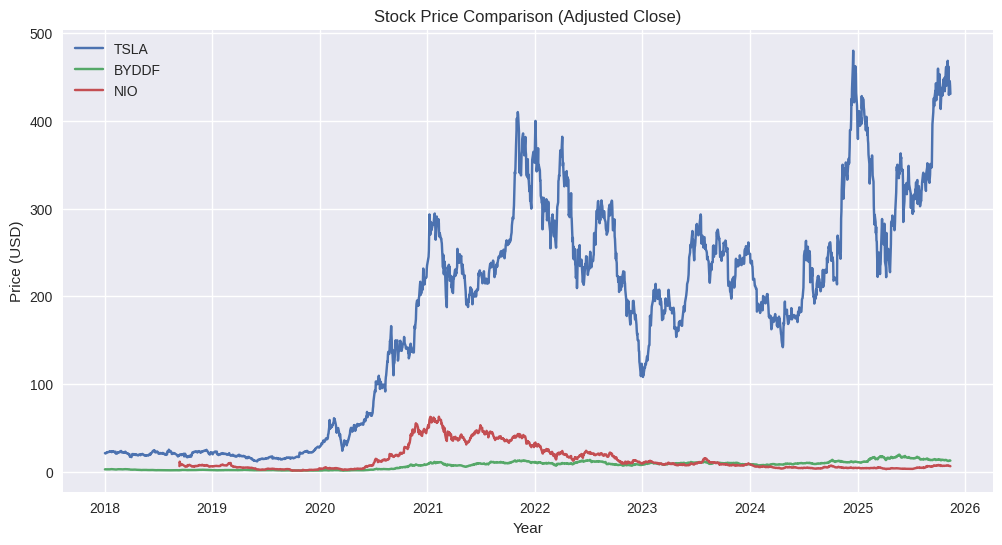

In [8]:
plt.figure(figsize=(12,6))
for ticker in tickers:
    plt.plot(data.index, data[ticker], label=ticker)

plt.title("Stock Price Comparison (Adjusted Close)")
plt.xlabel("Year")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()


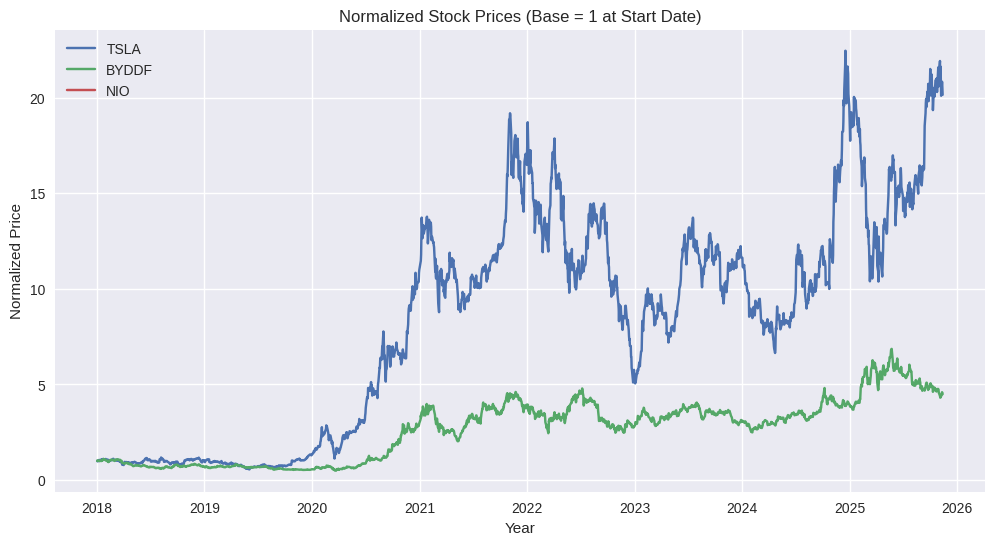

In [9]:
# Normalize all prices so they start from 1
normalized = data / data.iloc[0]

plt.figure(figsize=(12,6))
for ticker in tickers:
    plt.plot(normalized.index, normalized[ticker], label=ticker)

plt.title("Normalized Stock Prices (Base = 1 at Start Date)")
plt.xlabel("Year")
plt.ylabel("Normalized Price")
plt.legend()
plt.show()


In [10]:
# Calculate daily percentage returns
returns = data.pct_change().dropna()

# Display first few rows
returns.head()


Ticker,BYDDF,NIO,TSLA
Date,,,
2018-09-13,0.029877,0.757576,-0.003717
2018-09-14,0.069966,-0.146552,0.019830
2018-09-17,-0.017544,-0.141414,-0.001220
2018-09-18,0.006494,-0.096471,-0.033510
2018-09-19,0.074193,0.106771,0.049340


In [11]:
summary = pd.DataFrame({
    "Average Annual Return": (returns.mean() * 252),
    "Annual Volatility": (returns.std() * np.sqrt(252)),
    "Sharpe Ratio (approx)": (returns.mean() * 252) / (returns.std() * np.sqrt(252))
})

summary


,Average Annual Return,Annual Volatility,Sharpe Ratio (approx)
Ticker,,,
BYDDF,0.401076,0.509406,0.787340
NIO,0.364441,0.885191,0.411709
TSLA,0.643897,0.649413,0.991506


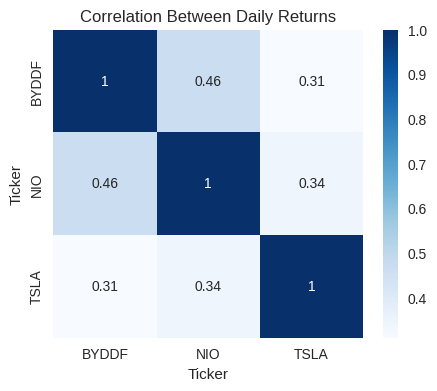

In [12]:
import seaborn as sns
plt.figure(figsize=(5,4))
sns.heatmap(returns.corr(), annot=True, cmap="Blues")
plt.title("Correlation Between Daily Returns")
plt.show()


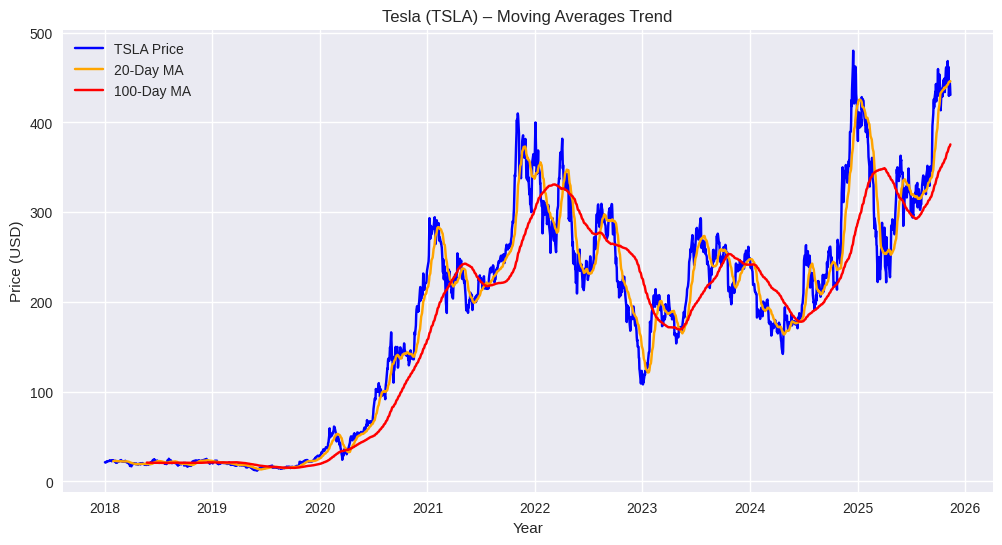

In [13]:
# Calculate short-term and long-term moving averages for Tesla
tsla = data['TSLA'].dropna()
tsla_short = tsla.rolling(window=20).mean()
tsla_long = tsla.rolling(window=100).mean()

# Plot
plt.figure(figsize=(12,6))
plt.plot(tsla.index, tsla, label="TSLA Price", color='blue')
plt.plot(tsla_short.index, tsla_short, label="20-Day MA", color='orange')
plt.plot(tsla_long.index, tsla_long, label="100-Day MA", color='red')

plt.title("Tesla (TSLA) – Moving Averages Trend")
plt.xlabel("Year")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()


In [14]:
summary.to_csv("stock_summary.csv")
